In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [81]:
def ret_int_rr(Nt, Nao, Ntau):
    return 6. * 1./6 * (Nt+1) * (Nt+2) * (Nt+3) * Nao**3

def tv_int_rtv(Nt, Nao, Ntau):
    return 6. * 1./2 * (Nt+1) * (Nt+2) * (Ntau+1) * Nao**3

def tv_int_tvm(Nt, Nao, Ntau):
    return 6. * (Ntau+1)**2 * (Nt+1) * Nao**3

def les_int_rl(Nt, Nao, Ntau):
    return 6. * 1./6 * (Nt+1) * (Nt+2) * (Nt+3) * Nao**3

def les_int_la(Nt, Nao, Ntau):
    return 6. * 1./3 * (Nt+1) * (Nt+2) * (Nt+3) * Nao**3

def les_int_tvvt(Nt, Nao, Ntau):
    return 6. * (Nt+1)**2 * (Ntau+1) * Nao**3

#################################################################

def ret_cont(Nt, Nao, Ntau):
    return 6. * 1./2 * (Nt+1) * (Nt+2) * Nao**5 * 8.

def les_cont(Nt, Nao, Ntau):
    return 6. * 1./2 * (Nt+1) * (Nt+2) * Nao**5 * 4.

def tv_cont(Nt, Nao, Ntau):
    return 6. * (Nt+1) * (Ntau+1) * Nao**5 * 4.

##################################################################

def ret_int_rr_tstp(T, Nao, Ntau):
    return 6. * 1./2 * (T+1) * (T+2) * Nao**3

def tv_int_rtv_tstp(T, Nao, Ntau):
    return 6. * (Ntau+1) * (T+1) * Nao**3

#def tv_int_tvm_tstp(Nt, Nao, Ntau):
#    return 6. * (Ntau+1)**2 * (Nt+1) * Nao**3

def les_int_rl_tstp(T, Nao, Ntau):
    return 6. * 1./2 * (T+1) * (T+2) * Nao**3

def les_int_la_tstp(T, Nao, Ntau):
    return 6. * (T+1) * (T+1) * Nao**3

def les_int_tvvt_tstp(T, Nao, Ntau):
    return 6. * (T+1) * (Ntau+1) * Nao**3

#################################################################

def ret_cont_tstp(T, Nao, Ntau):
    return 6. * (T+1) * Nao**5 * 8.

def les_cont_tstp(T, Nao, Ntau):
    return 6. * (T+1) * Nao**5 * 4.

def tv_cont_tstp(T, Nao, Ntau):
    return 6. * (Ntau+1) * Nao**5 * 4.

#################################################################

def read_times(filename, k, data):
    timefile = open(filename, 'r')
    lines = data.shape[0]*k
    for tstp in np.arange(data.shape[0]):
        for i in np.arange(k):
            data[tstp] += float(timefile.readline())/k
            
#################################################################

def fill_flops(func, k, data, Nao, Ntau):
    Nt = data.shape[0]
    for t in np.arange(Nt):
        data[t] = func(t+k+1, Nao, Ntau)

In [99]:
Nt = 7500
k = 5
Ntau = 128
Nao = 15

tstps = np.arange(k+1,Nt+1)

ret_int_rr_tstp_flops = np.zeros(Nt-k)
tv_int_rtv_tstp_flops = np.zeros(Nt-k)
les_int_rl_tstp_flops = np.zeros(Nt-k)
les_int_la_tstp_flops = np.zeros(Nt-k)
les_int_tvvt_tstp_flops = np.zeros(Nt-k)
ret_cont_tstp_flops = np.zeros(Nt-k)
les_cont_tstp_flops = np.zeros(Nt-k)
tv_cont_tstp_flops = np.zeros(Nt-k)

ret_int_rr_tstp_times = np.zeros(Nt-k)
tv_int_rtv_tstp_times = np.zeros(Nt-k)
les_int_rl_tstp_times = np.zeros(Nt-k)
les_int_la_tstp_times = np.zeros(Nt-k)
les_int_tvvt_tstp_times = np.zeros(Nt-k)
ret_cont_tstp_times = np.zeros(Nt-k)
les_cont_tstp_times = np.zeros(Nt-k)
tv_cont_tstp_times = np.zeros(Nt-k)

In [106]:
prefix = f"/pauli-storage/tblommel/NEdyson_data/timing_data/Nao{Nao}Nt{Nt}Ntau{Ntau}"

read_times(prefix + "ret_cont.dat", 5, ret_cont_tstp_times)
read_times(prefix + "les_cont.dat", 5, les_cont_tstp_times)
read_times(prefix + "tv_cont.dat", 5, tv_cont_tstp_times)
read_times(prefix + "ret_int.dat", 5, ret_int_rr_tstp_times)
read_times(prefix + "tv_int_rtv.dat", 5, tv_int_rtv_tstp_times)
read_times(prefix + "les_int_rl.dat", 5, les_int_rl_tstp_times)
read_times(prefix + "les_int_la.dat", 5, les_int_la_tstp_times)
read_times(prefix + "les_int_tvvt.dat", 5, les_int_tvvt_tstp_times)

fill_flops(ret_int_rr_tstp, k, ret_int_rr_tstp_flops, Nao, Ntau)
fill_flops(tv_int_rtv_tstp, k, tv_int_rtv_tstp_flops, Nao, Ntau)
fill_flops(les_int_rl_tstp, k, les_int_rl_tstp_flops, Nao, Ntau)
fill_flops(les_int_la_tstp, k, les_int_la_tstp_flops, Nao, Ntau)
fill_flops(les_int_tvvt_tstp, k, les_int_tvvt_tstp_flops, Nao, Ntau)
fill_flops(ret_cont_tstp, k, ret_cont_tstp_flops, Nao, Ntau)
fill_flops(les_cont_tstp, k, les_cont_tstp_flops, Nao, Ntau)
fill_flops(tv_cont_tstp, k, tv_cont_tstp_flops, Nao, Ntau)


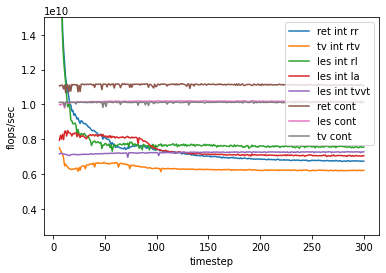

In [88]:
plt.plot(tstps, ret_int_rr_tstp_flops/ret_int_rr_tstp_times, label = "ret int rr")
plt.plot(tstps, tv_int_rtv_tstp_flops/tv_int_rtv_tstp_times, label = "tv int rtv")
plt.plot(tstps, les_int_rl_tstp_flops/les_int_rl_tstp_times, label = "les int rl")
plt.plot(tstps, les_int_la_tstp_flops/les_int_la_tstp_times, label = "les int la")
plt.plot(tstps, les_int_tvvt_tstp_flops/les_int_tvvt_tstp_times, label = "les int tvvt")
plt.plot(tstps, ret_cont_tstp_flops/ret_cont_tstp_times, label = "ret cont")
plt.plot(tstps, les_cont_tstp_flops/les_cont_tstp_times, label = "les cont")
plt.plot(tstps, tv_cont_tstp_flops/tv_cont_tstp_times, label = "tv cont")
plt.ylim([0.25e10,1.5e10])
plt.legend()
plt.ylabel('flops/sec')
plt.xlabel('timestep')
plt.savefig("flops_s_vs_timestep.pdf", format='pdf')

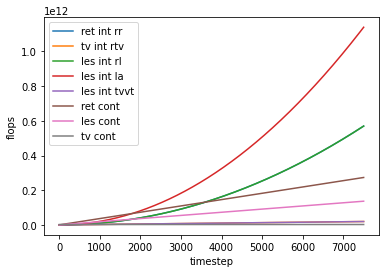

In [101]:
plt.plot(tstps, ret_int_rr_tstp_flops, label = "ret int rr")
plt.plot(tstps, tv_int_rtv_tstp_flops, label = "tv int rtv")
plt.plot(tstps, les_int_rl_tstp_flops, label = "les int rl")
plt.plot(tstps, les_int_la_tstp_flops, label = "les int la")
plt.plot(tstps, les_int_tvvt_tstp_flops, label = "les int tvvt")
plt.plot(tstps, ret_cont_tstp_flops, label = "ret cont")
plt.plot(tstps, les_cont_tstp_flops, label = "les cont")
plt.plot(tstps, tv_cont_tstp_flops, label = "tv cont")
#plt.ylim([0.25e10,1.5e10])
plt.legend()
plt.ylabel('flops')
plt.xlabel('timestep')
plt.savefig("flops_vs_timestep_7500.pdf", format='pdf')

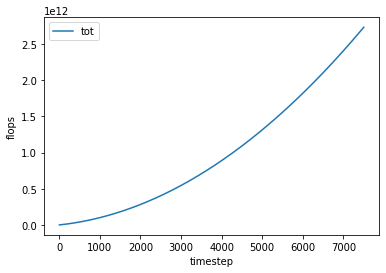

In [102]:
tot_times = ret_int_rr_tstp_times + tv_int_rtv_tstp_times + les_int_rl_tstp_times + les_int_la_tstp_times + les_int_tvvt_tstp_times + ret_cont_tstp_times + les_cont_tstp_times + tv_cont_tstp_times
plt.plot(tstps, tot_times, label = "tot")
plt.legend()
plt.ylabel('cumulative time (s)')
plt.xlabel('timestep')
plt.savefig("tot_fl_vs_timestep_7500.pdf", format='pdf')

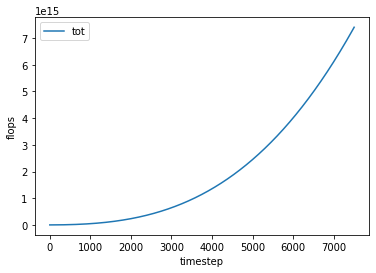

In [103]:
cum_flops = np.cumsum(tot_flops)
plt.plot(tstps, cum_flops, label = "tot")
plt.legend()
plt.ylabel('flops')
plt.xlabel('timestep')
plt.savefig("cum_flops_vs_timestep_7500.pdf", format='pdf')

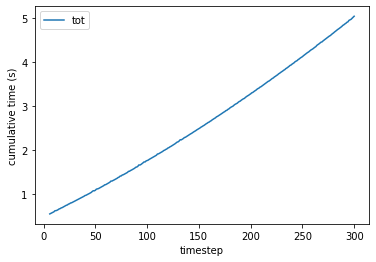

In [107]:
tot_times = ret_int_rr_tstp_times + tv_int_rtv_tstp_times + les_int_rl_tstp_times + les_int_la_tstp_times + les_int_tvvt_tstp_times + ret_cont_tstp_times + les_cont_tstp_times + tv_cont_tstp_times
plt.plot(tstps, tot_times, label = "tot")
plt.legend()
plt.ylabel('cumulative time (s)')
plt.xlabel('timestep')
plt.savefig("tot_time_vs_timestep_300.pdf", format='pdf')

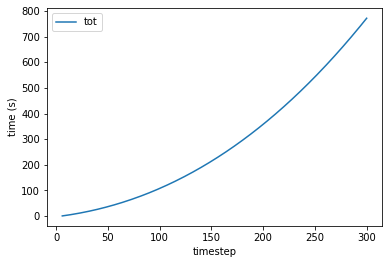

In [108]:
cum_times = np.cumsum(tot_times)
plt.plot(tstps, cum_times, label = "tot")
plt.legend()
plt.ylabel('time (s)')
plt.xlabel('timestep')
plt.savefig("cum_time_vs_timestep_300.pdf", format='pdf')

In [109]:
def memory(Nt, Nao, Ntau):
    tv = 16. * 2. * Ntau * Nt * Nao**2
    retles = 16. * 2. * 2. * 1./2 * Nt * (Nt+1) * Nao**2
    return tv+retles

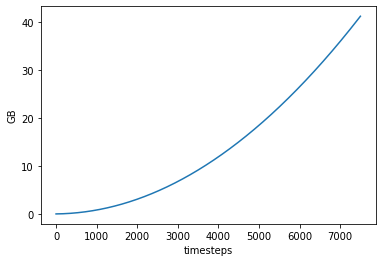

In [113]:
memory_t = np.zeros(7500)
for t in np.arange(7500):
    memory_t[t] = memory(t, 15, 128)
plt.plot(np.arange(7500), memory_t/(10e9))
plt.xlabel("timesteps")
plt.ylabel("GB")
plt.savefig("mem_vs_timestep.pdf", format='pdf')